# Survival

One of the challenges for this exercise is to find the information you need yourself. You will have to use a library for data visualization called *Seaborn*. For each exercise you should try to find in the [documentation](https://seaborn.pydata.org/api.html#) which function you can use and how to use it. The Seaborn website also contains a [tutorial](https://seaborn.pydata.org/tutorial.html) that provides you with a quick overview of the things that are possible in Seaborn, and also shows you how to use its functions.

The exercises below are all inspired by reasearch in different fields of biology. Most `seaborn` functions are built to utilize `pandas`'s `DataFrame` and `Series` structures. As such, you should try to use them as much as possible! 

Before you start, first load the required libraries below. 

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="darkgrid")

# 1. Mass vs Metabolism
(adapted from [Data Carpentry for Biologists](https://datacarpentry.org/semester-biology/))

The relationship between the body size of an organism and its metabolic rate is one of the most well studied and still most controversial areas of organismal physiology. We want to graph this relationship in the [Artiodactyl](https://en.wikipedia.org/wiki/Even-toed_ungulate) using a subset of data from a large compilation of body size data (Savage et al. 2004):

In [61]:
body_mass = [32000, 37800, 347000, 4200, 196500, 100000, 4290, 
32000, 65000, 69125, 9600, 133300, 150000, 407000, 115000, 67000, 
325000, 21500, 58588, 65320, 85000, 135000, 20500, 1613, 1618]

metabolic_rate = [49.984, 51.981, 306.770, 10.075, 230.073, 
148.949, 11.966, 46.414, 123.287, 106.663, 20.619, 180.150, 
200.830, 224.779, 148.940, 112.430, 286.847, 46.347, 142.863, 
106.670, 119.660, 104.150, 33.165, 4.900, 4.865]

### Exercises

- 1.1 Create a `DataFrame` from these two lists and make a plot for body mass vs. metabolic rate.
- 1.2 Create a second plot for log(body mass) vs. log(metabolic rate). To set a log scale for both axes use:

```
ax = plt.gca()
ax.set(xscale="log", yscale="log")
```

> Think about what the shape of these graphs tells you about the relationship between mass and metabolic rate.

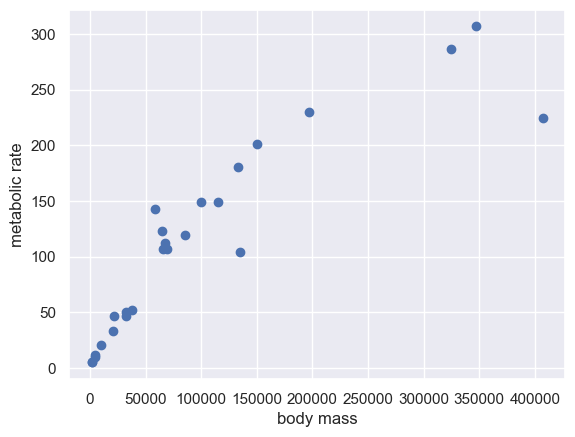

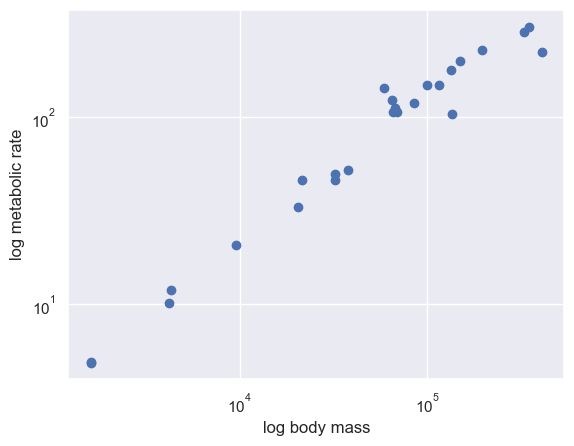

In [62]:
df = pd.DataFrame({
    'Body Mass': body_mass,
    'Metabolic Rate': metabolic_rate
})

# 1.1 Plot for body mass vs. metabolic rate
plt.figure()
plt.scatter(df['Body Mass'], df['Metabolic Rate'])
plt.ylabel('metabolic rate')
plt.xlabel('body mass')
plt.show()

# 1.2 Plot for log(body mass) vs. log(metabolic rate)
plt.figure()
plt.scatter(df['Body Mass'], df['Metabolic Rate'])
plt.ylabel('log metabolic rate')
plt.xlabel('log body mass')
ax = plt.gca()
ax.set(xscale="log", yscale="log")
plt.show()


# 2. Shrub Volume

Dr. Granger is interested in studying the factors controlling the size and carbon storage of shrubs. This research is part of a larger area of research trying to understand carbon storage by plants. She has conducted a small preliminary experiment looking at the effect of three different treatments on shrub volume at four different locations. She wants to conduct a preliminary analysis of these data to include in a grant proposal and she would like you to conduct the analysis for her (she might be a world renowned expert in carbon storage in plants, but she sure doesn’t know much about computers). The data is included in the assignment files and loaded in the code in the cell below.

### Exercises:

- 2.1 Import the data using Pandas and print out the first few rows of the data using the `.head()` method.
- 2.2 Select the data from the length column and print it.
- 2.3 Multiply the length, width, and height columns together to get a `volume` `Series`, add it to the `DataFrame` with an appropriate column name, and print the first few rows.
- 2.4 Add a `carbon` column containing the shrub carbon storage given by the equation `1.8 + 2 * np.log(volume)` where `volume` is the volume of the shrub you have calculated in 2.3. Try to think of a way to do this without a loop (for a hint, look back at the pandas exercises!).
- 2.5 Select the height data for all of the plants with heights greater than 5 and print out the result.
- 2.6 The following code displays the average height of a plant at each site:
```
data_means = data.groupby('site').mean()
print(data_means['height'])
```
Modify the code to calculate the average height of a plant in each experiment type.
- 2.7 Calculate the maximum heights of the plants at each site and print it out.
- 2.8 Using Seaborn, create a [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) showing the average carbon storage per experiment. Note that you do **not** have to use `groupby()` here, as Seaborn does it for you automatically when creating a barplot!

   site  experiment  length  width  height
0     1           1     2.2    1.3     9.6
1     1           2     2.1    2.2     7.6
2     1           3     2.7    1.5     2.2
3     2           1     3.0    4.5     1.5
4     2           2     3.1    3.1     4.0
0     2.2
1     2.1
2     2.7
3     3.0
4     3.1
5     2.5
6     1.9
7     1.1
8     3.5
9     2.9
10    4.5
11    1.2
Name: length, dtype: float64
0    27.456
1    35.112
2     8.910
3    20.250
4    38.440
Name: volume, dtype: float64
0    8.425169
1    8.917086
2    6.174348
3    7.816310
4    9.098197
Name: carbon, dtype: float64
0     9.6
1     7.6
8     7.5
10    6.5
Name: height, dtype: float64
experiment
1    4.70
2    5.10
3    3.85
Name: height, dtype: float64
site
1    9.6
2    4.0
3    7.5
4    6.5
Name: height, dtype: float64


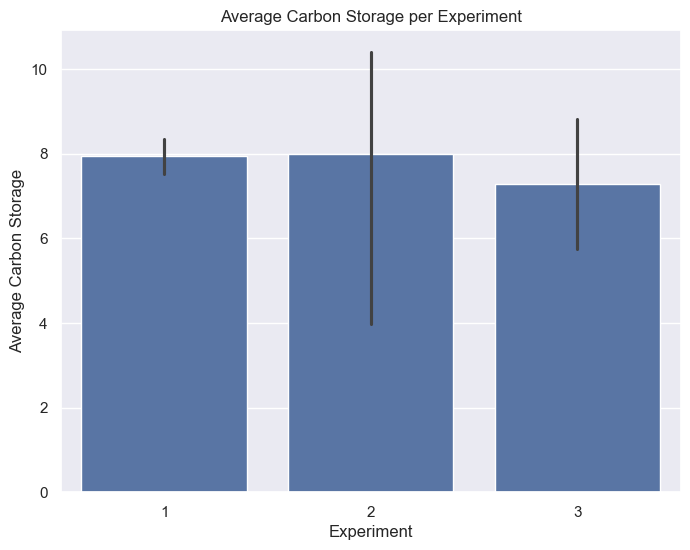

In [63]:
df_shrubs = pd.read_csv('data/shrub-volume-data.csv')

# 2.1
print(df_shrubs.head())

# 2.2
length_data = df_shrubs['length']
print(length_data)

# 2.3
df_shrubs['volume'] = df_shrubs['length'] * df_shrubs['width'] * df_shrubs['height']
print(df_shrubs['volume'].head())

# 2.4
df_shrubs['carbon'] = 1.8 + 2 * np.log(df_shrubs['volume'])
print(df_shrubs['carbon'].head())

# 2.5
height_above_5 = df_shrubs[df_shrubs['height'] > 5]['height']
print(height_above_5)

# 2.6
data_means = df_shrubs.groupby('experiment')['height'].mean()
print(data_means)

# 2.7
max_heights = df_shrubs.groupby('site')['height'].max()
print(max_heights)

# 2.8
plt.figure(figsize=(8, 6))
sns.barplot(x='experiment', y='carbon', data=df_shrubs)
plt.title('Average Carbon Storage per Experiment')
plt.ylabel('Average Carbon Storage')
plt.xlabel('Experiment')
plt.show()


# 3. Adult vs Newborn Size
(adapted from [Data Carpentry for Biologists](https://datacarpentry.org/semester-biology/)) 

It makes sense that larger organisms have larger offspring, but what the mathematical form of this relationship should be is unclear. Let’s look at the problem empirically for mammals.

Import the mammal-data (`'data/mammal_lifehistories.tsv'`) into a Pandas `DataFrame`.

Import the data into Python. If you’ve looked at a lot of data you’ll realize that this dataset is tab delimited. The special character to indicate a tab in Python is `'\t'`.

Missing data in this file is specified by `-999` and `-999.00`. Tell Pandas that these are null values using the following optional `read_csv()` argument: `na_values=['-999', '-999.00']`. This will stop them from being plotted.

There are some extra blank lines at the end of this file, so get rid of them. You can use array slicing for this.

### Exercises

- 3.1 Graph adult mass vs. newborn mass. Don't forget to label the axes!
- 3.2 Graph the log of adult mass vs. the log of newborn mass. Don't forget to label the axes!
- 3.3 For data where `order` is `'Rodentia'`, graph the log of adult mass vs. the log of newborn mass. Label the axes.

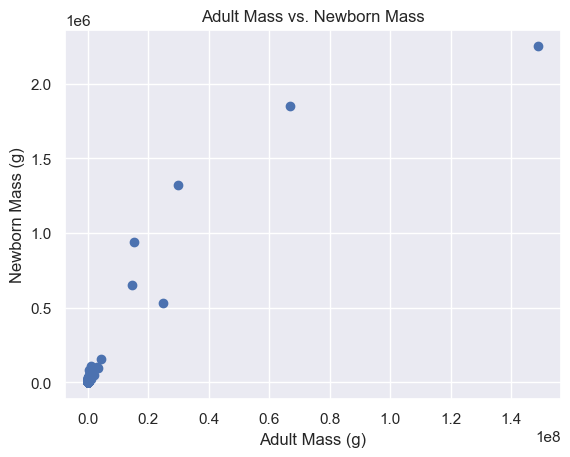

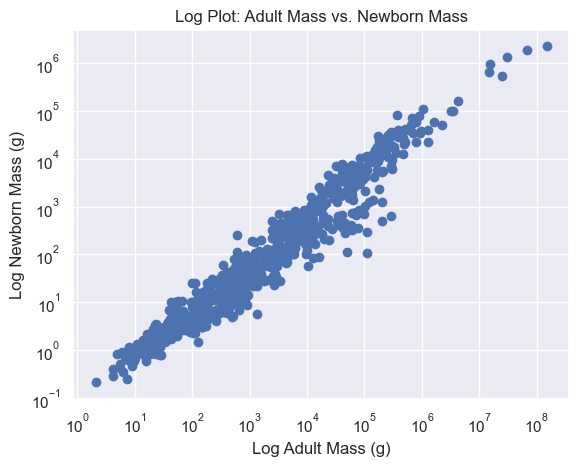

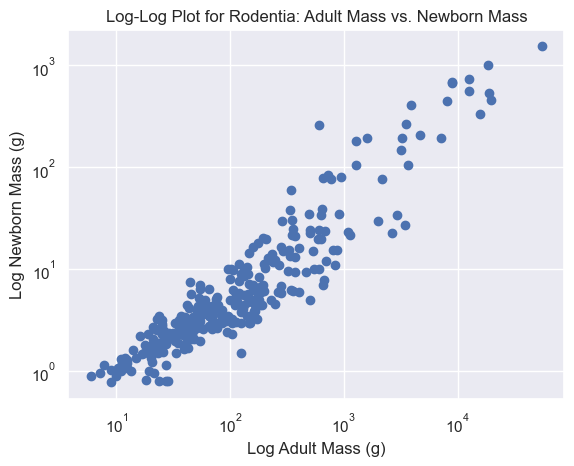

In [64]:
mammal_data = pd.read_csv('data/mammal_lifehistories.tsv', delimiter='\t', na_values=['-999', '-999.00'])

# I figured its easier to remove where all are NaN, intead of slicing
mammal_data.dropna(how='all', inplace=True)

# 3.1 
plt.scatter(mammal_data['mass(g)'], mammal_data['newborn(g)'])
plt.xlabel('Adult Mass (g)')
plt.ylabel('Newborn Mass (g)')
plt.title('Adult Mass vs. Newborn Mass')
plt.show()

# 3.2 
plt.scatter(mammal_data['mass(g)'], mammal_data['newborn(g)'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log Adult Mass (g)')
plt.ylabel('Log Newborn Mass (g)')
plt.title('Log Plot: Adult Mass vs. Newborn Mass')
plt.show()

# 3.3 
rodentia_data = mammal_data[mammal_data['order'] == 'Rodentia']

plt.scatter(rodentia_data['mass(g)'], rodentia_data['newborn(g)'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log Adult Mass (g)')
plt.ylabel('Log Newborn Mass (g)')
plt.title('Log-Log Plot for Rodentia: Adult Mass vs. Newborn Mass')
plt.show()


# 4. Mammal Body Size
(adapted from [Data Carpentry for Biologists](https://datacarpentry.org/semester-biology/))

There were a relatively large number of extinctions of mammalian species roughly 10,000 years ago. To help understand why these extinctions happened scientists are interested in understanding whether there were differences in the body size of those species that went extinct and those that did not.

The dataset `'data/mammal.tsv'` is the largest dataset on mammalian body size in the world. This dataset has data on the mass of recently extinct mammals as well as extant mammals (i.e., those that are still alive today). Take a look at the [original dataset's metadata](https://web.archive.org/web/20191219110715/http://www.esapubs.org/archive/ecol/E084/094/metadata.htm) to understand the structure of the data. One key thing to remember is that species can occur on more than one continent, and if they do then they will occur more than once in this dataset. 

The data also contains entries marked as *historical*, those can be considered *extinct*. It also containse entries marked *introduction*, those can be considered *extant*. You can use the pandas method `replace()` to change those values in your `DataFrame`.

Let’s explore the data.

### Exercises

- 4.1 Determine the number of species. Remember that a species is uniquely defined by the combination of its genus name and its species name. Print the result to the screen. The number should be somewhere between 4000 and 5000.
- 4.2 Find out how many of the species are extinct and how many are extant, print the result to the screen. **HINT:** first separate the data into the extinct and extant components and then count the number of species.
- 4.3 Find out how many families are present in the dataset.
- 4.4 Now print the genus name, the species name, and the mass of the largest and smallest species. Note that it is not possible for a mammal to have negative mass. 
- 4.5 Create a plot that shows the average body size for extinct species versus extant species. Make sure that is directly clear from the plot which is which. What kind of plot should you use here?


The number of unique species: 4889
Number of extinct species: 319
Number of extant species: 4576
Number of families: 153
Smallest species: Suncus etruscus with mass 1.8g
Largest species: Balaenoptera musculus with mass 190000000.0g


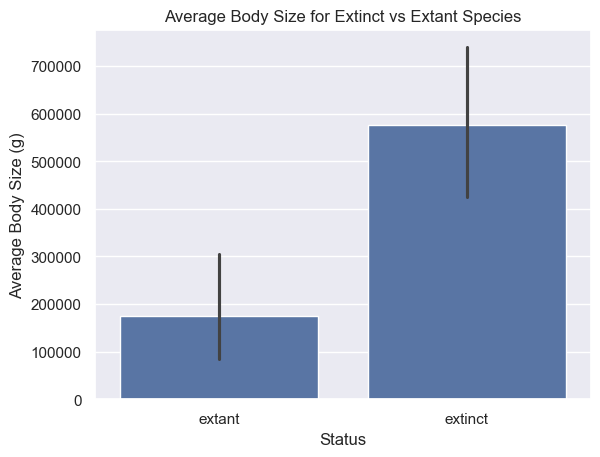

In [65]:
column_names = ['continent', 'status', 'order', 'family', 'genus', 'species', 'log_mass', 'mass', 'longevity']
mammal_data = pd.read_csv('data/mammal.tsv', delimiter='\t', names=column_names)

# Replace the values in the 'status' column
mammal_data['status'] = mammal_data['status'].replace({'historical': 'extinct', 'introduction': 'extant'})

# 4.1
unique_species = mammal_data[['genus', 'species']].drop_duplicates()

number_of_species = len(unique_species)

print(f'The number of unique species: {number_of_species}')

# 4.2
extinct_species = mammal_data[mammal_data['status'] == 'extinct']
extant_species = mammal_data[mammal_data['status'] == 'extant']

extinct_count = len(extinct_species[['genus', 'species']].drop_duplicates())
extant_count = len(extant_species[['genus', 'species']].drop_duplicates())

print(f'Number of extinct species: {extinct_count}')
print(f'Number of extant species: {extant_count}')

# 4.3
number_of_families = mammal_data['family'].nunique()

print(f'Number of families: {number_of_families}')

# 4.4
# Based on the question there should be 0/negative, so I'll drop it
valid_mammal_data = mammal_data[mammal_data['mass'] > 0]

smallest_species = valid_mammal_data.loc[valid_mammal_data['mass'].idxmin()]
largest_species = valid_mammal_data.loc[valid_mammal_data['mass'].idxmax()]

print(f"Smallest species: {smallest_species['genus']} {smallest_species['species']} with mass {smallest_species['mass']}g")
print(f"Largest species: {largest_species['genus']} {largest_species['species']} with mass {largest_species['mass']}g")

# 4.5
sns.barplot(x='status', y='mass', data=valid_mammal_data)
plt.xlabel('Status')
plt.ylabel('Average Body Size (g)')
plt.title('Average Body Size for Extinct vs Extant Species')
plt.show()

Looking at the average mass of extinct and extant species overall is interesting, but there are lots of different processes that could cause size-biased extinctions so it’s not as informative as we might like. However, if we see the exact same pattern on each of the different continents that might really tell us that there was some worldwide event. Repeat the analysis of before, but this time compare the mean masses within each of the different continents. 

The continent labels in the data are not very consistent in the data. For example `AUS`, `OC`, and `Oceanic` can all be merged. Try to find logical combinations, if you cannot, create a seperate category. It is important to clean this up for this assignment. Again, you can use `replace()` for this.

Try to make the code as clean as possible! There is no need to copy and paste the same code for each of the categories!

### Exercises

- 4.6 Create one barplot per continent where you show the average mass of the extant and extinct species on that continent. Also print the difference between the average extant and average extinct masses for each of the continents AF, AUS, EA and SA.

C:\Users\mstem\AppData\Local\Temp\ipykernel_31056\1983022011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_mammal_data['continent'] = valid_mammal_data['continent'].replace({


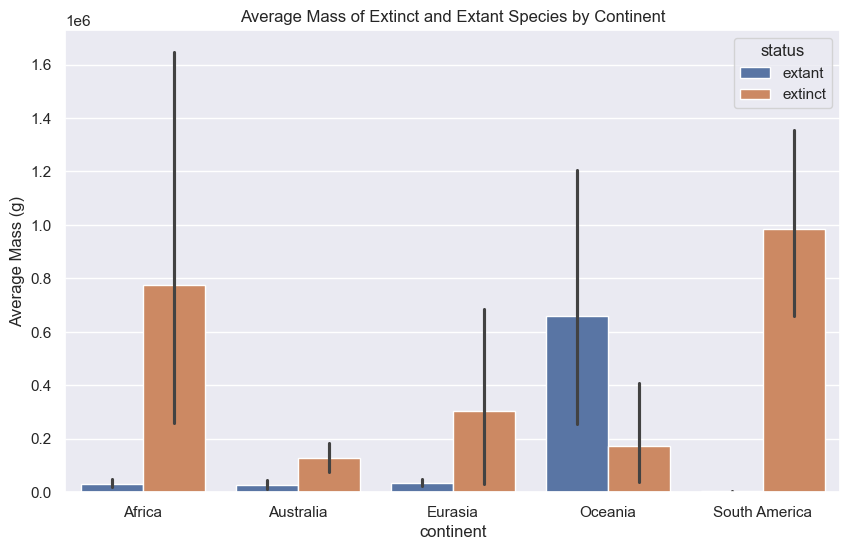

Difference in average mass for Africa: Extant - Extinct = -744708.71 g
Difference in average mass for Australia: Extant - Extinct = -99731.74 g
Difference in average mass for Eurasia: Extant - Extinct = -266211.81 g
Difference in average mass for South America: Extant - Extinct = -981762.46 g


In [71]:
# To check what namings there are
# unique_continents = mammal_data['continent'].unique()
# print(unique_continents)


# Oceanic is Ocean, not Oceania. But I'll follow the task.
valid_mammal_data['continent'] = valid_mammal_data['continent'].replace({
    'AF': 'Africa',
    'Af': 'Africa',
    'AUS': 'Australia',
    'EA': 'Eurasia',
    'Oceanic': 'Oceania',
    'Insular': 'Oceania',
    'SA': 'South America'
})

# Create a barplot for each continent comparing extinct and extant species
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='mass', hue='status', data=valid_mammal_data)
plt.title('Average Mass of Extinct and Extant Species by Continent')
plt.ylabel('Average Mass (g)')
plt.show()



# Calculate and print the difference between average extant and extinct masses for selected continents
continents_of_interest = ['Africa', 'Australia', 'Eurasia', 'South America']

# Calculate average mass by continent and status (extinct or extant)
continent_mass_means = valid_mammal_data.groupby(['continent', 'status'])['mass'].mean().reset_index()

# Loop through each continent of interest and calculate the difference in mass
for continent in continents_of_interest:
    
    # Get the average mass of extant species for the current continent
    extant_mass = continent_mass_means[(continent_mass_means['continent'] == continent) & (continent_mass_means['status'] == 'extant')]['mass'].values[0]
    
    # Get the average mass of extinct species for the current continent
    extinct_mass = continent_mass_means[(continent_mass_means['continent'] == continent) & (continent_mass_means['status'] == 'extinct')]['mass'].values[0]
    
    difference = extant_mass - extinct_mass
    
    print(f"Difference in average mass for {continent}: Extant - Extinct = {difference:.2f} g")


We have previously compared the average masses of extant and extinct species on different continents to try to understand whether size has an influence on extinction in mammals. Looking at the averages was a good start, but we really need to look at the full distributions of masses of the two groups to get the best picture of whether or not there was a major size bias in extinctions during the late Pleistocene. 


### Exercises


- 4.7 Make a plot for each continent that you think is worth visualizing. Each plot should contain two histograms that display the number of extinct and extant species. Take a look at [this page from the tutorial](https://seaborn.pydata.org/tutorial/distributions.html) to see how you can easily plot these distributions. Use the log(mass) rather than the mass itself so that you can see the form of the distributions more clearly. Label the axes appropriately.

    Example of what *one* such a plot _could_ look like:

    <img src="data/log mass dist SA.png"></img>
    
Sidenote: Histogram refers to a graphical representation that displays data by way of bars to show the distribution of numerical data. A barplot is a representation of data that uses bars to compare different categories of data. In other words, a histogram presents numerical data whereas a barplot shows categorical data. [This website](https://keydifferences.com/difference-between-histogram-and-bar-graph.html) gives a more comprehensive list of differences (it also lists visual differences and why these are present).

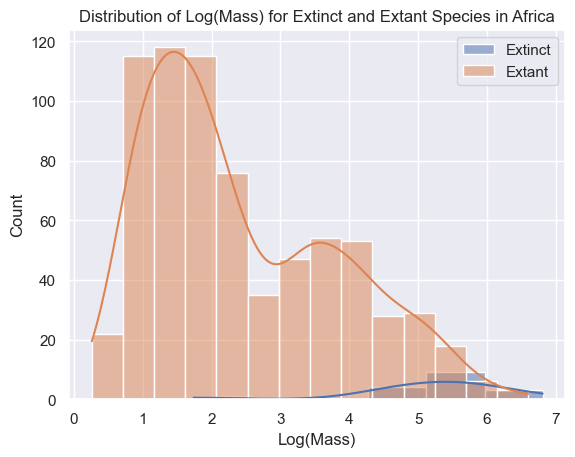

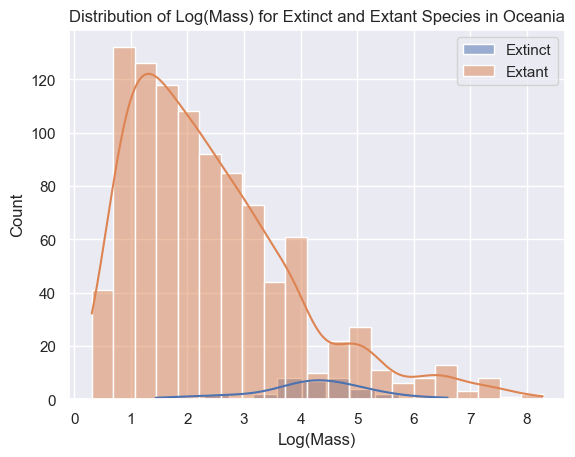

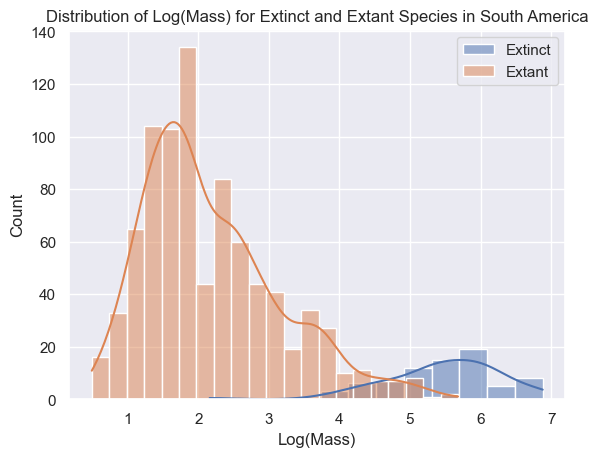

In [88]:
continents_to_visualize = ['Africa', 'Oceania', 'South America']

# Plot for each continent
for continent in continents_to_visualize:

    # Data for the current continent
    continent_data = valid_mammal_data[valid_mammal_data['continent'] == continent]
    
    # Plot extinct species
    sns.histplot(continent_data[continent_data['status'] == 'extinct']['log_mass'], label='Extinct', kde=True)
    
    # Plot extant species
    sns.histplot(continent_data[continent_data['status'] == 'extant']['log_mass'], label='Extant', kde=True)
    
    # Set plot titles and labels
    plt.title(f'Distribution of Log(Mass) for Extinct and Extant Species in {continent}')
    plt.xlabel('Log(Mass)')
    plt.ylabel('Count')
    plt.legend()
 
    plt.show()

# 5 Mushrooms

For this last exercise we're going to work with a dataset on mushrooms. More information on the dataset, take a look at [the webpage of the original study that is the source of this dataset](http://archive.ics.uci.edu/ml/datasets/Mushroom).  Again, the data is included into the package of this exercise; read the data from `'data/mushrooms.csv'` into a Pandas `DataFrame`. 

The dataset contains an annotated collection of edible and poisonous mushrooms. The ediblity is related to many other properties, like the odor of the mushroom, the cap shape, the cap color, etc.

This exercise requires a bit more creativity than before. It is up to you to figure out how to go about answering the following questions.

### Exercises

- 5.1 Download and explore the dataset. Generate a histogram that shows the relation between *cap shape* and edibility. This graph should at least give an answer to the following questions: Is a mushroom with a bell shape more often poisonous or edible? What about a mushroom that is knobbed? 

To aid you in understanding the dataset, we've already included some code that will make the dataframe more readable. 

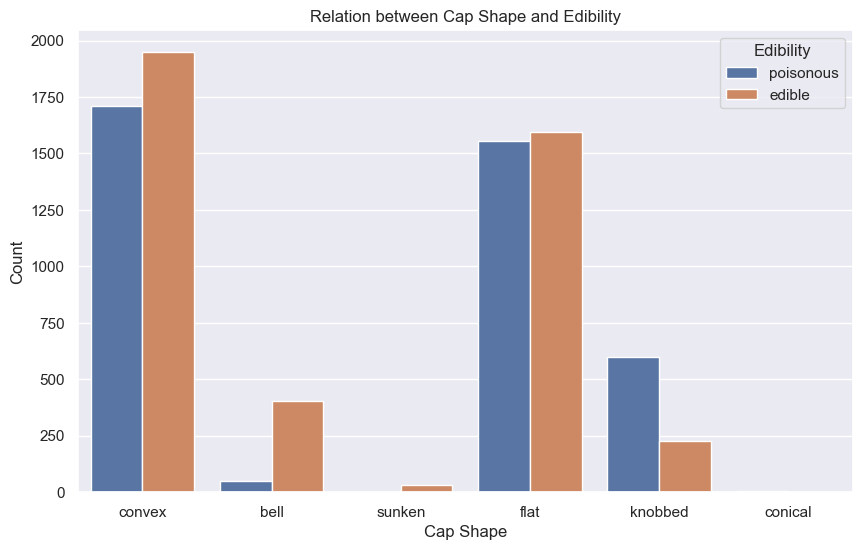

In [51]:
nested_value_dict = {'class': {'p': 'poisonous', 'e': 'edible'}
     , 'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
     , 'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
     , 'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'bruises': {'t': 'bruises', 'f': 'no'}
     , 'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
     , 'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
     , 'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'}
     , 'gill-size': {'b': 'broad', 'n': 'narrow'}
     , 'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'stalk-shape': {'e': 'enlarging', 't': 'tapering'}
     , 'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
     , 'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
     , 'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
     , 'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'veil-type': {'p': 'partial', 'u': 'universal'}, 'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
     , 'ring-number': {'n': 'none', 'o': 'one', 't': 'two'}
     , 'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
     , 'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
     , 'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
     , 'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}}

df_mushroom = pd.read_csv('data/mushrooms.csv')
df_mushroom = df_mushroom.replace(nested_value_dict)

sns.countplot(x='cap-shape', hue='class', data=df_mushroom)
plt.title('Relation between Cap Shape and Edibility')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.legend(title='Edibility')
plt.show()


Let's say you want to give a friend some advice on picking mushrooms. You would like this friend to live so you have to find a description that garantees the mushroom to be edible. For example, all mushrooms with a sunken cap shape are edible.

The problem with that description is that there are very few mushrooms that fit it. 

### Exercises

- 5.2 Find a description that describes as many edible mushrooms as possible without also describing poisonous mushrooms. 

    **HINT:** Besides cap shape, there are other properties of mushrooms that have unique values that can only occur within edible (or inedible) mushrooms. Maybe we can even make combinations of properties of which we know that mushrooms that have or don't have those properties must be edible. 

    Note that there is not a single correct answer. The answer depends on how complex you allow the description to be. It is up to you to make a sensible and *reasonable* choice here. We are more interested in the way you get to an answer than the answer itself, so **include graphs and comments that explain your choices**.
    
    
> Hopefully needless to say, but **don't try out this strategy for finding edible mushrooms in real life!**.

In [57]:
# Because I don't have any room for mistakes and I have to recommend as many mushrooms as possible. 
# I will make a list of characteristics that only belong to non-poisonous mushrooms. And recommend to pick a mushroom if it has at least one of them
# This approach won't cover intersections between characteristics, but it is a much simpler check-list based on the group features.

# Filter out poisonous mushrooms
edible_mushrooms = df_mushroom[df_mushroom['class'] == 'edible']
poisonous_mushrooms = df_mushroom[df_mushroom['class'] == 'poisonous']

# Drop categories (values) that are present in both edible and poisonous mushrooms
safe_characteristics = {}

# Iterate over each column (characteristic) except 'class'
for column in df_mushroom.columns:

    # Skip the 'class' column
    if column != 'class':  

        # Get unique values for edible and poisonous mushrooms
        edible_values = set(edible_mushrooms[column].unique())
        poisonous_values = set(poisonous_mushrooms[column].unique())
        
        # Find values that are only in edible mushrooms (not in poisonous ones)
        unique_edible_values = edible_values - poisonous_values
        
        # If there are any values that are exclusive to edible mushrooms, save them
        if unique_edible_values:
            safe_characteristics[column] = unique_edible_values



# Construct a descriptive sentence
description_parts = []

for characteristic, values in safe_characteristics.items():
    
    # Combine values for each characteristic with a "/"
    values_str = "/".join(values)
    description_parts.append(f"{characteristic}: {values_str}")

# Combine all the characteristic descriptions with " or "
final_description = " or ".join(description_parts)

# Print the final description sentence
print("To pick a mushroom that is guaranteed to be edible, look for a mushroom with at least 1 of the following properties:")
print(final_description)

To pick a mushroom that is guaranteed to be edible, look for a mushroom with the following properties:
cap-shape: sunken or cap-color: purple/green or odor: almond/anise or gill-color: red/orange or stalk-root: rooted or stalk-color-above-ring: red/gray/orange or stalk-color-below-ring: red/gray/orange or veil-color: brown/orange or ring-type: flaring or spore-print-color: yellow/buff/purple/orange or population: abundant/numerous or habitat: waste
